# Reading an Argo CTD cycle data

## The first cycle

<img src="https://github.com/euroargodev/argoonlineschool/raw/master/images/ArgoCycle.png" alt="ArgoCycle" width="1200"/>

An **Argo cycle** starts with a descent toward deep water, usually from the surface, and ends after the next programmed ascent to the surface (see the figure). During the surface interval, data transmission typically occurs but it is not a requirement for a cycle to have occurred, but if ocurrs, the cycle ends after the full surface interval has been completed.

Nowdays Argo floats can measure differnte parametres, however, we will focus in what is called the *[Argo core mission](https://argo.ucsd.edu/about/mission/)* ,this is observations of temperature, salinity and pressure down to 2000 metres of depth. The measurements are performed during ascent, occasionally during descent, and  subsurface measurements during parking are sometime performed.

Each cycle of a float has a unique number, increased by one after each ascent to the surfce or shallow water. Float cycle numbers usually start at 1. The next cycles are increasing numbers (e.g. 2, 3,...N). Some floats report a cycle 0, called *launch cycle*, that is shorther than the regular cycles. The cycle time is therefore regular only for later profiles and may be variable if the float is reprogrammed after its deployment.

For those floats with cycle 0, if there is an initial descend profile, it would be on cycle 0.

First, import libraries

In [1]:
import numpy as np
import xarray as xr
import netCDF4
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
cy1  = xr.open_dataset('./Data/6901254/profiles/R6901254_001.nc')

Printing the object gives you summary information

In [3]:
cy1

<xarray.Dataset>
Dimensions:                       (N_PROF: 2, N_PARAM: 3, N_LEVELS: 97, N_HISTORY: 3, N_CALIB: 1)
Dimensions without coordinates: N_PROF, N_PARAM, N_LEVELS, N_HISTORY, N_CALIB
Data variables: (12/64)
    DATA_TYPE                     object ...
    FORMAT_VERSION                object ...
    HANDBOOK_VERSION              object ...
    REFERENCE_DATE_TIME           object ...
    DATE_CREATION                 object ...
    DATE_UPDATE                   object ...
    ...                            ...
    HISTORY_QCTEST                (N_HISTORY, N_PROF) object ...
    PARAMETER                     (N_PROF, N_CALIB, N_PARAM) object ...
    SCIENTIFIC_CALIB_EQUATION     (N_PROF, N_CALIB, N_PARAM) object ...
    SCIENTIFIC_CALIB_COEFFICIENT  (N_PROF, N_CALIB, N_PARAM) object ...
    SCIENTIFIC_CALIB_COMMENT      (N_PROF, N_CALIB, N_PARAM) object ...
    SCIENTIFIC_CALIB_DATE         (N_PROF, N_CALIB, N_PARAM) object ...
Attributes:
    title:                Argo float vertical profile
    institution:          CORIOLIS
    source:               Argo float
    history:              2019-01-15T11:25:18Z creation; 2019-01-15T11:25:24Z...
    references:           http://www.argodatamgt.org/Documentation
    user_manual_version:  3.1
    Conventions:          Argo-3.1 CF-1.6
    featureType:          trajectoryProfile
    decoder_version:      CODA_027d

We see how useful is the **Self-Describing** propierty of the netCDF format. 

The name for the core observations, temperature, salinity and pressure down to 2000 metres of depth, are TEMP, SALT and PRES. Although we could inspect the previous print-out of the *cy1* dataset, we can use the data itself:

In [4]:
print(f"The core variables are: \n TEMP {cy1.TEMP.long_name} \n PSAL {cy1.PSAL.long_name} and \n PRES{cy1.PRES.long_name}")

The core variables are: 
 TEMP Sea temperature in-situ ITS-90 scale 
 PSAL Practical salinity and 
 PRESSea water pressure, equals 0 at sea-level


>>
In this file we also have the variables TEMP_ADJUSTED, PSAL_ADJUSTED and PRES_ADJUSTED, that correspond to data that has gone through the second stage of quality control. However, here we keep the focus in the Real Time data in section [Real-Time and Delayed mode data](https://euroargodev.github.io/argoonlineschool/L40_RTandDM.html) we will describe in detail de quality control.
>>


In [5]:
print(f"The dimesions of TEMP are:\n {cy1.TEMP.dims[0]}:{cy1.TEMP.shape[0]} \n {cy1.TEMP.dims[1]}:{cy1.TEMP.shape[1]}")

The dimesions of TEMP are:
 N_PROF:2 
 N_LEVELS:97


We note that for for the first cycle there are two profiles (N_PROF=2) and 95 vertical levels... lets plot them:

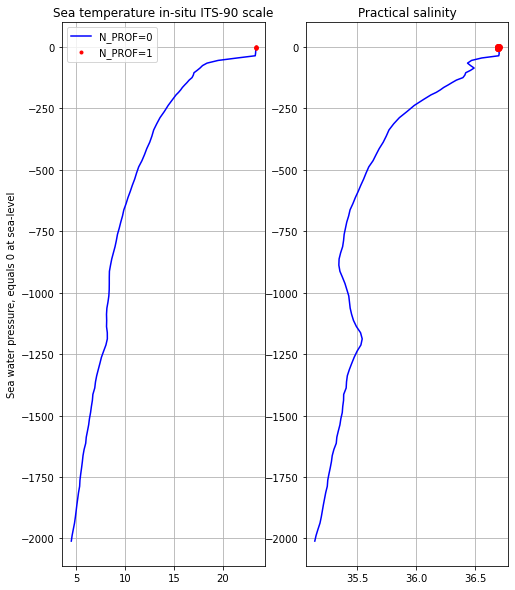

In [6]:
fig, ax = plt.subplots(1,2,figsize=(8,10))

#Temperature
ax[0].plot(cy1.TEMP[0],-cy1.PRES[0],'b-',label='N_PROF=0')
ax[0].plot(cy1.TEMP[1],-cy1.PRES[1],'r.',label='N_PROF=1')
ax[0].set_title(cy1.TEMP.long_name)
ax[0].set_ylabel(cy1.PRES.long_name)
ax[0].grid()
ax[0].legend()

#Salinity
ax[1].plot(cy1.PSAL[0],-cy1.PRES[0],'b-',label='N_PROF=0')
ax[1].plot(cy1.PSAL[1],-cy1.PRES[1],'ro',label='N_PROF=1')
ax[1].set_title(cy1.PSAL.long_name)
ax[1].grid()

This is, within the cycle file, there area two profiles. The first one (N_PROF=0 in blue) it is measured during its ascend from 2000 dbar to 5 dbar and it constitutes the core argo program; the second one (N_PROF=1 in red) only measures the top 5 dbar. 

Once again all the information is in the netcf file, the data variable *VERTICAL_SAMPLING_SCHEME* contains all the details:

In [7]:
print(f"The first profile is the: { str(cy1.VERTICAL_SAMPLING_SCHEME[0].astype(str).values) }")

The first profile is the: Primary sampling: averaged [10 sec sampling, 25 dbar average from 2000 dbar to 200 dbar; 10 sec sampling, 10 dbar average from 200 dbar to 10 dbar; 10 sec sampling, 1 dbar average from 10 dbar to 5.5 dbar]                                                   


In [8]:
print(f"The second profile is the: {cy1.VERTICAL_SAMPLING_SCHEME[1].astype(str).values}")

The second profile is the: Near-surface sampling: averaged, unpumped [10 sec sampling, 1 dbar average from 5.5 dbar to surface]                                                                                                                                                            


Ago floats may measure several profiles in each cycle, however as a rule of thumb the first profile is always the **core mission argo CTD profile** (2000 dbar - 5 dbar). In the case of this float there is an additional second profile, with higher resolution (10 sec sampling and 1 dbar average) but unpumped, this is the sensor of conductity (for salinity) is not pumping water through to avoid contamination or biodeposition from the surface. The data from this second profile is used, mostly, for calibrations of SST observations from satellite.

In the *Reference table 16: vertical sampling schemes* of the *Argo Data Management Team. Argo user’s manual. https://doi.org/10.13155/29825* there is a description of all the different options in VERTICAL_SAMPLING_SCHEME. However a discusion of all of them is beyond the objective of this AoS than focus on understanding the basic concepts.

## The descending profile
As mentioned before, some floats also make measurmentes in the first descending phase of the first cycle, the data is in the <R/D><FloatWmoID>_001D.nc file

In [9]:
cy1D = xr.open_dataset('./Data/6901254/profiles/R6901254_001D.nc')

In [10]:
print(f"The dimesions of TEMP are:\n {cy1D.TEMP.dims[0]}:{cy1D.TEMP.shape[0]} \n {cy1D.TEMP.dims[1]}:{cy1D.TEMP.shape[1]}")

The dimesions of TEMP are:
 N_PROF:1 
 N_LEVELS:51


in this case there is only one profile, let's plot it together with the ascending data (cy1):


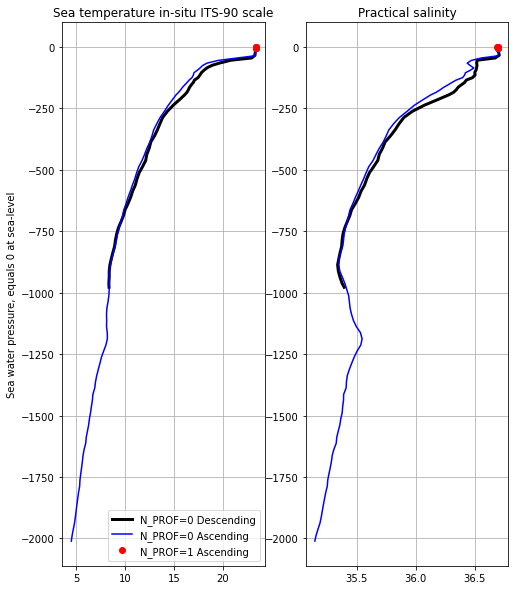

In [11]:
fig, ax = plt.subplots(1,2,figsize=(8,10))

#Temperature
ax[0].plot(cy1D.TEMP[0],-cy1D.PRES[0],'k-',label='N_PROF=0 Descending',linewidth=3.0)
ax[0].plot(cy1.TEMP[0],-cy1.PRES[0],'b-',label='N_PROF=0 Ascending')
ax[0].plot(cy1.TEMP[1],-cy1.PRES[1],'ro',label='N_PROF=1 Ascending')
ax[0].set_title(cy1.TEMP.long_name)
ax[0].set_ylabel(cy1.PRES.long_name)
ax[0].grid()
ax[0].legend()

#Salinity
ax[1].plot(cy1D.PSAL[0],-cy1D.PRES[0],'k-',label='N_PROF=0 Descending',linewidth=3.0)
ax[1].plot(cy1.PSAL[0],-cy1.PRES[0],'b-',label='N_PROF=0 Ascending')
ax[1].plot(cy1.PSAL[1],-cy1.PRES[1],'ro',label='N_PROF=1 Ascending')
ax[1].set_title(cy1.PSAL.long_name)
ax[1].grid()

As indicated in the figura, the first descending is only until the parking depth.

## Geographical information
The netcdf file include the information about the geographical postion of the observations (LONGITUDE and LATITUDE) and the date of the observation (JULD)

In [12]:
for variable in ['LONGITUDE', 'LATITUDE' , 'JULD']:
   print(f"The {cy1.data_vars[variable].long_name} is in the variable {variable}")

The Longitude of the station, best estimate is in the variable LONGITUDE
The Latitude of the station, best estimate is in the variable LATITUDE
The Julian day (UTC) of the station relative to REFERENCE_DATE_TIME is in the variable JULD


Let's plot it

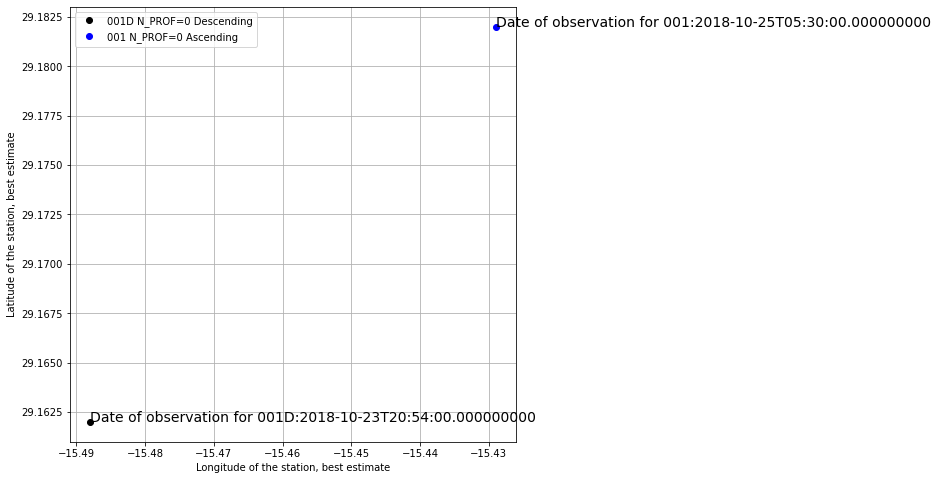

In [13]:
fig, ax = plt.subplots(figsize=(8,8))

ax.plot(cy1D.LONGITUDE[0],cy1D.LATITUDE[0],'ko',label='001D N_PROF=0 Descending')
ax.plot(cy1.LONGITUDE[0],cy1.LATITUDE[0],'bo',label='001 N_PROF=0 Ascending')
#ax.set_title(cy1..long_name)
ax.set_xlabel(cy1.LONGITUDE.long_name)
ax.set_ylabel(cy1.LATITUDE.long_name)
ax.text(cy1D.LONGITUDE[0],cy1D.LATITUDE[0],'Date of observation for 001D:'+cy1D.JULD[0].values.astype(str), fontsize=14)
ax.text(cy1.LONGITUDE[0],cy1.LATITUDE[0],'Date of observation for 001:'+cy1.JULD[0].values.astype(str), fontsize=14)
ax.grid()
ax.legend();

The 2 ascending profiles in 001 have, obviously, the same time stamp:

In [14]:
print(cy1.JULD[0].values.astype(str))
print(cy1.JULD[1].values.astype(str))

2018-10-25T05:30:00.000000000
2018-10-25T05:30:00.000000000


Note that for some floats there is a <R/D><FloatWmoID>_000.n or even a <R/D><FloatWmoID>_000D.n file.

## Meta information in the cycle file
The netcdf file for each cycle includes a lot of additional information about each one of the profiles in it. Let's take a look of the basic information. 

In [15]:
print(f"For cycle {cy1D.CYCLE_NUMBER.astype(int).values} The {cy1D.DIRECTION.long_name} (DIRECTION) is {cy1D.DIRECTION.values.astype(str)}")
print(f"For cycle  {cy1.CYCLE_NUMBER.astype(int).values} the {cy1.DIRECTION.long_name}  (DIRECTION) is {cy1.DIRECTION.values.astype(str)}")

For cycle [1] The Direction of the station profiles (DIRECTION) is ['D']
For cycle  [1 1] the Direction of the station profiles  (DIRECTION) is ['A' 'A']


A is for ascending and D for descending.

And all the meta information of the float, and for each profile within each cycle, among others:

In [16]:
for variable in ['PLATFORM_NUMBER','DATA_CENTRE','PROJECT_NAME','PI_NAME']:
   print(f"The {cy1.data_vars[variable].long_name} ({variable}) is {cy1.data_vars[variable].values.astype(str)}")

The Float unique identifier (PLATFORM_NUMBER) is ['6901254 ' '6901254 ']
The Data centre in charge of float data processing (DATA_CENTRE) is ['IF' 'IF']
The Name of the project (PROJECT_NAME) is ['ARGO SPAIN                                                      '
 'ARGO SPAIN                                                      ']
The Name of the principal investigator (PI_NAME) is ['Pedro Velez                                                     '
 'Pedro Velez                                                     ']


We can also access the dimession that define the profile

In [17]:
for key in cy1.dims.keys():
    print(key,cy1.dims[key])

N_PROF 2
N_PARAM 3
N_LEVELS 97
N_HISTORY 3
N_CALIB 1


N_LEVELS is the number of vertical leves, i.e. in pressure. N_PROF the number of profiles within the cycle, as we saw previously and N_PARAM is te number of paramters, 3 for this float: TEMP, PSAL and PRES

Later we will explain N_CALIB and N_HISTORY

## Meta data
There is a lof of additional meta information in the `<FloatWmoID>_meta.nc` file

In [18]:
Mdata = xr.open_dataset('./Data/6901254/6901254_meta.nc')

Always we have the basic information than appers in all the netcdf files of an Argo float:

In [19]:
for variable in ['PLATFORM_NUMBER','DATA_CENTRE','PROJECT_NAME','PI_NAME']:
   print(f"The {Mdata.data_vars[variable].long_name} ({variable}) is {Mdata.data_vars[variable].values.astype(str)}")

The Float unique identifier (PLATFORM_NUMBER) is 6901254 
The Data centre in charge of float real-time processing (DATA_CENTRE) is IF
The Program under which the float was deployed (PROJECT_NAME) is ARGO SPAIN                                                      
The Name of the principal investigator (PI_NAME) is Pedro Velez                                                     


and some examples of addtional information

In [20]:
for variable in ['FIRMWARE_VERSION','BATTERY_TYPE','DEPLOYMENT_PLATFORM','CONFIG_PARAMETER_NAME','SENSOR_SERIAL_NO']:
   print(f"The {Mdata.data_vars[variable].long_name} ({variable}) is {Mdata.data_vars[variable].values.astype(str)}")

The Firmware version for the float (FIRMWARE_VERSION) is n/a                             
The Type of battery packs in the float (BATTERY_TYPE) is LITHIUM                                                         
The Identifier of the deployment platform (DEPLOYMENT_PLATFORM) is ANGELES ALVARI?O                
The Name of configuration parameter (CONFIG_PARAMETER_NAME) is ['CONFIG_CycleTime_hours                                                                                                          '
 'CONFIG_ParkPressure_dbar                                                                                                        '
 'CONFIG_ProfilePressure_dbar                                                                                                     '
 'CONFIG_DescentToParkPresSamplingTime_seconds                                                                                    '
 'CONFIG_Direction_NUMBER                                                                        

The full descritpion of variables is in the **Argo user's Manual**